In [4]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("TOP 50 BILLIONAIRES LIST.csv")
df.head()

,RANK,NAME,NET WORTH,AGE,SOURCE,COUNTRY/TERRITORY
0,1.0,Bernard Arnault & family,$176.6 B,73.0,LVMH,France
1,2.0,Elon Musk,$146.5 B,51.0,"Tesla, SpaceX",United States
2,3.0,Gautam Adani,$116.7 B,60.0,"infrastructure, commodities",India
3,4.0,Jeff Bezos,$108.5 B,58.0,Amazon,United States
4,5.0,Warren Buffett,$106.3 B,92.0,Berkshire Hathaway,United States


trocando os valores hong kong por china

In [6]:
df1 = df.replace('Hong Kong','China')
df1.head(1)

,RANK,NAME,NET WORTH,AGE,SOURCE,COUNTRY/TERRITORY
0,1.0,Bernard Arnault & family,$176.6 B,73.0,LVMH,France


agrupa por paises checa quantos valores estao atribuidos a cada paises

In [17]:
df1.groupby('COUNTRY/TERRITORY').size()

COUNTRY/TERRITORY
Australia         2
Canada            2
Chile             1
China            17
France            7
Germany           6
India             6
Indonesia         3
Italy             1
Japan             3
Mexico            2
Russia            7
Singapore         1
Spain             1
Switzerland       1
United States    40
dtype: int64

In [19]:
df1[df1['COUNTRY/TERRITORY']== 'China']

,RANK,NAME,NET WORTH,AGE,SOURCE,COUNTRY/TERRITORY
14,15.0,Zhong Shanshan,$67.8 B,68.0,"beverages, pharmaceuticals",China
23,24.0,Zhang Yiming,$49.5 B,38.0,TikTok,China
30,31.0,Ma Huateng,$35.0 B,51.0,internet media,China
35,36.0,Li Ka-shing,$33.6,94.0,diversified,China
38,39.0,Robin Zeng,$32.7 B,53.0,batteries,China
41,42.0,Lee Shau Kee,$30.3 B,94.0,real estate,China
44,45.0,Colin Zheng Huang,$29.6 B,42.0,e-commerce,China
57,58.0,He Xiangjian & family,$23.7 B,80.0,home appliances,China
61,62.0,William Lei Ding,$23.3 B,51.0,online games,China
62,63.0,Wang Wei,$23.0 B,52.0,package delivery,China


criando a coluna Dinheiro com os valores float 

In [20]:
df1['Dinheiro'] = df1['NET WORTH'].str.replace('$','').str.replace('B','').astype(float)

C:\Users\CASA\AppData\Local\Temp\ipykernel_1004\2659141286.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Dinheiro'] = df1['NET WORTH'].str.replace('$','').str.replace('B','').astype(float)


In [21]:
df1.describe(include='all')

,RANK,NAME,NET WORTH,AGE,SOURCE,COUNTRY/TERRITORY,Dinheiro
count,100.000000,100,100,99.000000,100,100,100.000000
unique,NaN,100,82,NaN,77,16,NaN
top,NaN,Bernard Arnault & family,$16.8 B,NaN,hedge funds,United States,NaN
freq,NaN,1,4,NaN,5,40,NaN
mean,50.480000,NaN,NaN,68.121212,NaN,NaN,38.949000
std,29.026453,NaN,NaN,13.844083,NaN,NaN,29.774633
min,1.000000,NaN,NaN,36.000000,NaN,NaN,16.500000
25%,25.750000,NaN,NaN,58.000000,NaN,NaN,20.875000
50%,50.500000,NaN,NaN,68.000000,NaN,NaN,27.250000
75%,75.250000,NaN,NaN,78.500000,NaN,NaN,43.450000


In [9]:
df1.isna().sum()

RANK                 0
NAME                 0
NET WORTH            0
AGE                  1
SOURCE               0
COUNTRY/TERRITORY    0
dtype: int64

<AxesSubplot:ylabel='SOURCE'>

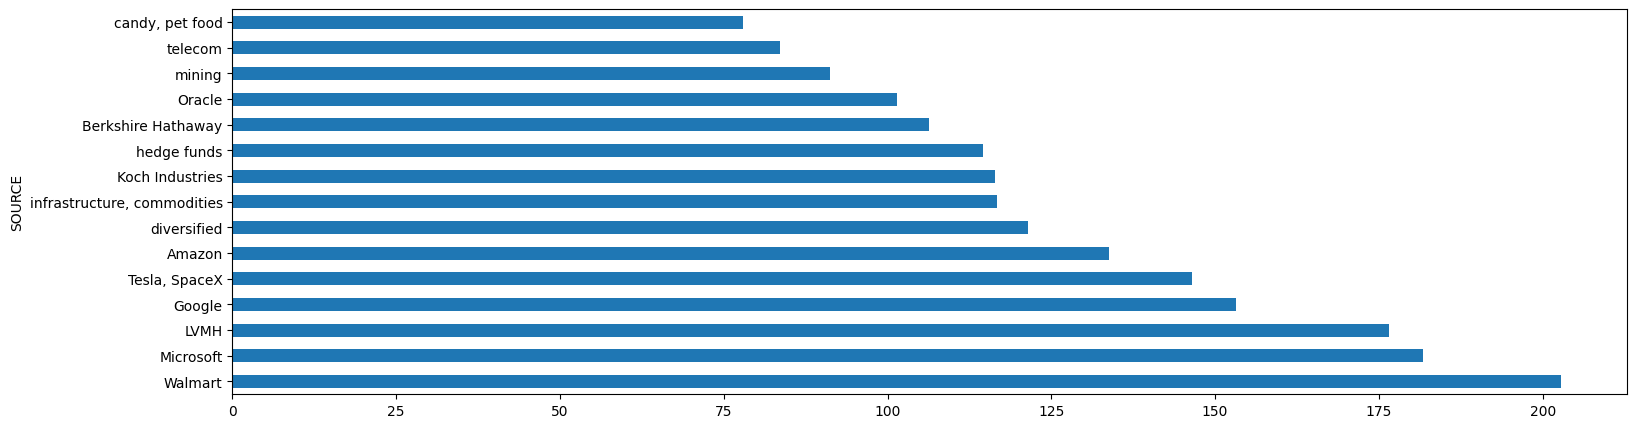

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5))
df1.groupby('SOURCE')['Dinheiro'].sum().sort_values(ascending=False).head(15).plot.barh()

<AxesSubplot:ylabel='COUNTRY/TERRITORY'>

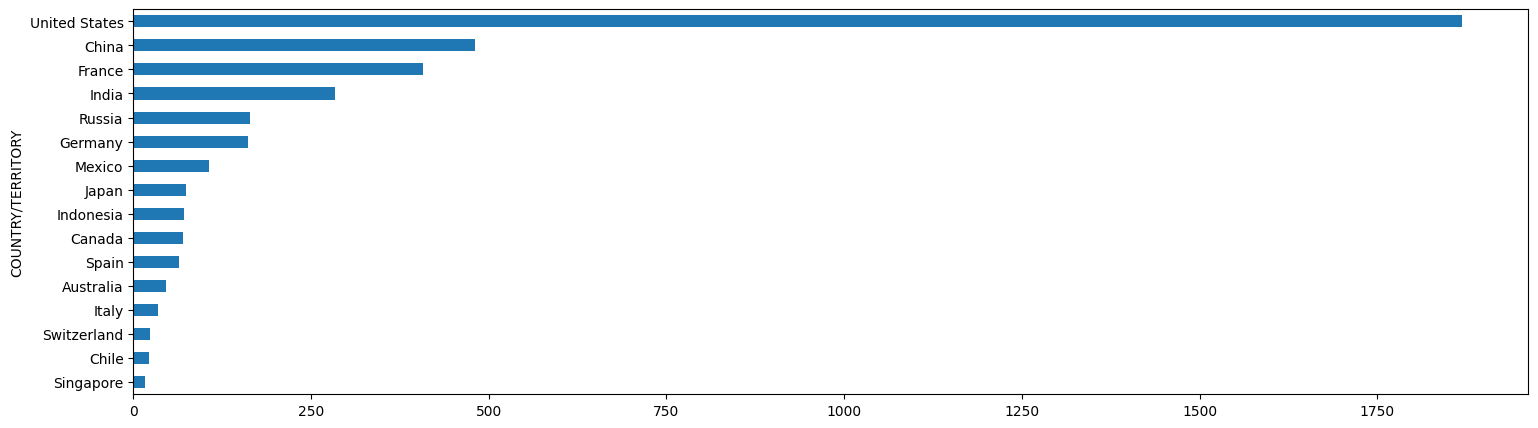

In [23]:
plt.figure(figsize=(18,5))
df1.groupby('COUNTRY/TERRITORY')['Dinheiro'].sum().sort_values(ascending=True).plot.barh()

agrupado por idade soma a quantidade de dinheiro 

In [24]:
df1.groupby('AGE')['Dinheiro'].sum().sort_values(ascending=False)

AGE
73.0    285.3
60.0    216.4
65.0    215.3
51.0    204.8
78.0    185.1
58.0    166.2
49.0    153.2
67.0    145.7
66.0    137.9
74.0    122.1
86.0    115.3
52.0    108.4
92.0    106.3
77.0    102.8
82.0    101.8
80.0    100.5
87.0     97.2
68.0     95.5
69.0     94.9
83.0     94.1
84.0     92.7
38.0     92.5
57.0     89.4
71.0     67.0
61.0     64.7
94.0     63.9
54.0     48.0
81.0     43.2
56.0     42.0
72.0     37.8
53.0     32.7
64.0     30.0
42.0     29.6
85.0     28.9
50.0     27.5
75.0     24.8
41.0     23.0
79.0     21.9
36.0     21.8
89.0     21.4
70.0     20.8
59.0     18.5
76.0     17.4
90.0     17.4
45.0     17.4
91.0     16.8
Name: Dinheiro, dtype: float64

curiosidade vendo os 5 mas novos e mas velhos 

In [8]:
display(df1.sort_values('AGE').head(5))
display(df1.sort_values('AGE').tail(5))


,RANK,NAME,NET WORTH,AGE,SOURCE,COUNTRY/TERRITORY
69,70.0,Lukas Walton,$21.8 B,36.0,Walmart,United States
25,26.0,Mark Zuckerberg,$43.0 B,38.0,Facebook,United States
23,24.0,Zhang Yiming,$49.5 B,38.0,TikTok,China
63,64.0,Guillaume Pousaz,$23.0 B,41.0,fintech,Switzerland
44,45.0,Colin Zheng Huang,$29.6 B,42.0,e-commerce,China


,RANK,NAME,NET WORTH,AGE,SOURCE,COUNTRY/TERRITORY
97,98.0,Rupert Murdoch & family,$16.8 B,91.0,"newspapers, TV network",United States
4,5.0,Warren Buffett,$106.3 B,92.0,Berkshire Hathaway,United States
35,36.0,Li Ka-shing,$33.6,94.0,diversified,China
41,42.0,Lee Shau Kee,$30.3 B,94.0,real estate,China
31,32.0,Beate Heister & Karl Albrecht Jr. & family,$35.0 B,NaN,supermarkets,Germany


In [28]:
print(df1['Dinheiro'].sum(),'\n3 trilhoes 894 bilhoes e o valor do dinheiro desses 100 bilhonarios juntos')

3894.9 
3 trilhoes 894 bilhoes e o valor do dinheiro desses 100 bilhonarios juntos


agrupado por paises podemos ver o valor em dinheiro 

In [30]:
valor_paises = df1.groupby('COUNTRY/TERRITORY')['Dinheiro'].sum().sort_values(ascending=False)
valor_paises

COUNTRY/TERRITORY
United States    1868.9
China             480.1
France            407.4
India             283.8
Russia            163.9
Germany           161.8
Mexico            107.1
Japan              74.4
Indonesia          71.6
Canada             69.7
Spain              64.0
Australia          45.8
Italy              35.0
Switzerland        23.0
Chile              21.9
Singapore          16.5
Name: Dinheiro, dtype: float64

adicionando a coluna pib dos paises informaçoes tiradas do google dados 2021

In [32]:
pib_paises = pd.Series(['23 trilhões USD','17,73 trilhões USD','2,937 trilhões USD','3,173 trilhões USD','1,776 trilhão USD'
,'4,223 trilhões USD','1,293 trilhão USD','4,937 trilhões USD','1,186 trilhão USD','1,991 trilhão USD'
,'1,425 trilhão USD','1,543 trilhão USD','2,1 trilhões USD','812,9 bilhões USD','317,1 bilhões USD','397 bilhões USD'],index=[
    'United States','China','France','India','Russia','Germany','Mexico','Japan','Indonesia','Canada','Spain','Australia',
    'Italy','Switzerland','Chile','Singapore'
],name='PIB Dos Paises')

adicionando coluna pib dos paises para analise 

In [33]:
analise = pd.concat([valor_paises,pib_paises],axis=1)
analise

,Dinheiro,PIB Dos Paises
United States,1868.9,23 trilhões USD
China,480.1,"17,73 trilhões USD"
France,407.4,"2,937 trilhões USD"
India,283.8,"3,173 trilhões USD"
Russia,163.9,"1,776 trilhão USD"
Germany,161.8,"4,223 trilhões USD"
Mexico,107.1,"1,293 trilhão USD"
Japan,74.4,"4,937 trilhões USD"
Indonesia,71.6,"1,186 trilhão USD"
Canada,69.7,"1,991 trilhão USD"


criando a coluna porcentagem

In [34]:
porcentagem = pd.Series(['8%','2,7%','13,9%','9%','9,2%','3,8%','8,4%','1,5%','6%','3,5%','4,5%','3%','1,7%','3%','7,1%','4,2%'],
index=['United States','China','France','India','Russia','Germany','Mexico','Japan','Indonesia','Canada','Spain','Australia',
    'Italy','Switzerland','Chile','Singapore'],name='Porcentagem')

In [35]:
analise1 = pd.concat([analise,porcentagem],axis=1)

podemos analisar quantos % do pib eles tem 

In [39]:
analise1

,Dinheiro,PIB Dos Paises,Porcentagem
United States,1868.9,23 trilhões USD,8%
China,480.1,"17,73 trilhões USD","2,7%"
France,407.4,"2,937 trilhões USD","13,9%"
India,283.8,"3,173 trilhões USD",9%
Russia,163.9,"1,776 trilhão USD","9,2%"
Germany,161.8,"4,223 trilhões USD","3,8%"
Mexico,107.1,"1,293 trilhão USD","8,4%"
Japan,74.4,"4,937 trilhões USD","1,5%"
Indonesia,71.6,"1,186 trilhão USD",6%
Canada,69.7,"1,991 trilhão USD","3,5%"


In [ ]:
'''valores_custon = analise1['Dinheiro'].map({1868.9:'1 Trilhões 868 Bilhões USD',480.1:'480 Bilhoes',407.4:'407 Bilhoes',283.8:'283 Bilhoes'
,163.9:'163 Bilhoes',161.8:'161 Bilhoes',107.1:'107 Bilhoes',74.4:'74 Bilhoes',71.6:'71 Bilhoes', 69.7:'69 Bilhoes'
,64.0:'64 Bilhoes',45.8:'45 Bilhoes',35.0:'35 Bilhoes',23.0:'23 Bilhoes',21.9:'21 Bilhoes',16.5:'16 Bilhoes'
})
valores_custon'''

agrupando por territorio usando as colunas age e dinheiro

In [55]:
agrupamento = df1.groupby('COUNTRY/TERRITORY')['AGE','Dinheiro']

C:\Users\CASA\AppData\Local\Temp\ipykernel_1004\1191943646.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agrupamento = df1.groupby('COUNTRY/TERRITORY')['AGE','Dinheiro']


analisando soma, media, tamanho colunas age , dinheiro

In [85]:
analise2 = agrupamento.agg([np.sum , np.mean, np.size, np.min, np.max])
analise2

AGE                             Dinheiro             \
                      sum       mean size  amin  amax      sum       mean   
COUNTRY/TERRITORY                                                           
Australia           129.0  64.500000    2  61.0  68.0     45.8  22.900000   
Canada              110.0  55.000000    2  45.0  65.0     69.7  34.850000   
Chile                79.0  79.000000    1  79.0  79.0     21.9  21.900000   
China              1049.0  61.705882   17  38.0  94.0    480.1  28.241176   
France              477.0  68.142857    7  52.0  86.0    407.4  58.200000   
Germany             355.0  71.000000    6  56.0  85.0    161.8  26.966667   
India               422.0  70.333333    6  60.0  81.0    283.8  47.300000   
Indonesia           238.0  79.333333    3  74.0  83.0     71.6  23.866667   
Italy                58.0  58.000000    1  58.0  58.0     35.0  35.000000   
Japan               215.0  71.666667    3  65.0  77.0     74.4  24.800000   
Mexico              151.0  75.500000    2  69.0  82.0    107.1  53.550000   
Russia              443.0  63.285714    7  50.0  72.0    163.9  23.414286   
Singapore            71.0  71.000000    1  71.0  71.0     16.5  16.500000   
Spain                86.0  86.000000    1  86.0  86.0     64.0  64.000000   
Switzerland          41.0  41.000000    1  41.0  41.0     23.0  23.000000   
United States      2820.0  70.500000   40  36.0  92.0   1868.9  46.722500   

                                     
                  size  amin   amax  
COUNTRY/TERRITORY                    
Australia            2  18.1   27.7  
Canada               2  17.4   52.3  
Chile                1  21.9   21.9  
China               17  16.7   67.8  
France               7  18.7  176.6  
Germany              6  17.7   35.0  
India                6  16.8  116.7  
Indonesia            3  21.5   27.8  
Italy                1  35.0   35.0  
Japan                3  21.2   30.3  
Mexico               2  23.5   83.6  
Russia               7  18.4   27.5  
Singapore            1  16.5   16.5  
Spain                1  64.0   64.0  
Switzerland          1  23.0   23.0  
United States       40  16.8  146.5

aplicando css basico na tabela pra ser  melhor visualizada 

In [87]:
analise2.astype(int).style.set_properties(**{'text-align': 'center'},color="yellow",**{'background-color': 'black'})